# Detect Fake News

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df.describe(include= 'all')

,Unnamed: 0,title,text,label
count,6335.000000,6335,6335,6335
unique,NaN,6256,6060,2
top,NaN,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,NaN,5,58,3171
mean,5280.415627,NaN,NaN,NaN
std,3038.503953,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,2674.500000,NaN,NaN,NaN
50%,5271.000000,NaN,NaN,NaN
75%,7901.000000,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

# Missing Value Treatment

In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

Unnamed: 0    0.0
title         0.0
text          0.0
label         0.0
dtype: float64

<AxesSubplot:>

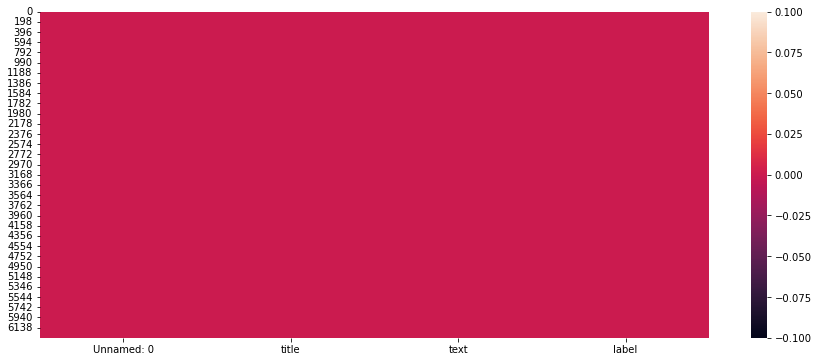

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Unnamed: 0', ylabel='count'>

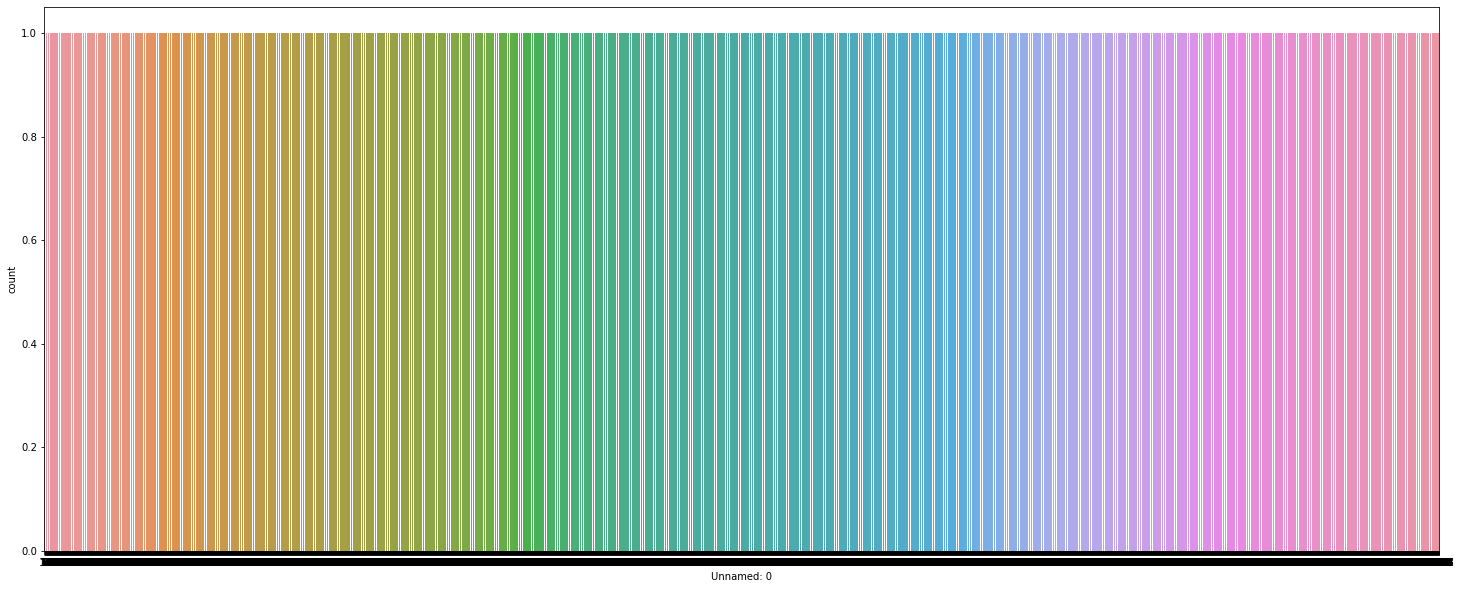

In [11]:
plt.figure(figsize=(25,10))
sns.countplot(x='Unnamed: 0',data=df)

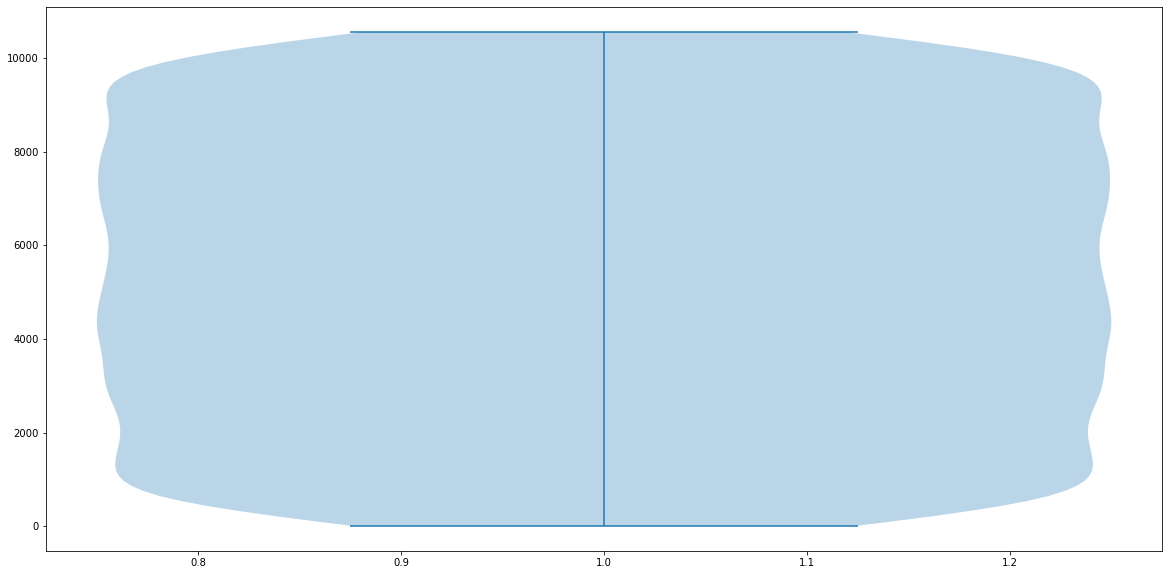

In [12]:
plt.figure(figsize=(20,10))
plt.violinplot(df['Unnamed: 0'])
plt.show()

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.drop('text',axis=1,inplace=True)

In [15]:
df['title'].nunique()

6256

In [16]:
df['title'].duplicated().sum()

79

In [17]:
#df.drop_duplicates(subset = 'title',inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   label   6335 non-null   object
dtypes: object(2)
memory usage: 99.1+ KB


In [19]:
df.head()

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL


In [20]:
# importing libraries
import nltk
import re
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
wd=WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    title = re.sub('[^a-zA-Z]',' ',df['title'][i])
    title = title.lower()
    title = title.split()
    
    title = [wd.lemmatize(word) for word in title if not word in sw.words('English')]
    title = ' '.join(title)
    corpus.append(title)

In [22]:
corpus

['smell hillary fear',
 'watch exact moment paul ryan committed political suicide trump rally video',
 'kerry go paris gesture sympathy',
 'bernie supporter twitter erupt anger dnc tried warn',
 'battle new york primary matter',
 'tehran usa',
 'girl horrified watch boyfriend left facetime',
 'britain schindler dy',
 'fact check trump clinton commander chief forum',
 'iran reportedly make new push uranium concession nuclear talk',
 'three clinton iowa glimpse fire eluded hillary clinton campaign',
 'donald trump shockingly weak delegate game somehow got even worse',
 'strong solar storm tech risk today news oct video',
 'way america preparing world war',
 'trump take cruz lightly',
 'woman lead differently',
 'shocking michele obama hillary caught glamorizing date rape promoter',
 'hillary clinton huge trouble america noticed sick thing hidden picture liberty writer news',
 'iran bill obama like',
 'chart explains everything need know partisanship america',
 'slippery slope trump propo

In [23]:
len(corpus)

6335

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [25]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
Y = df['label'].iloc[:].values

In [27]:
Y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [28]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=101)

In [29]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
Y_train

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

# GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [32]:
model_Gnb = GaussianNB()
model_Gnb.fit(X_train, Y_train)

GaussianNB()

In [33]:
Y_pred = model_Gnb.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [35]:
accuracy

0.6945540647198106

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
confusion_matrix(Y_test, Y_pred)

array([[335, 279],
       [108, 545]], dtype=int64)

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        FAKE       0.76      0.55      0.63       614
        REAL       0.66      0.83      0.74       653

    accuracy                           0.69      1267
   macro avg       0.71      0.69      0.69      1267
weighted avg       0.71      0.69      0.69      1267



# MultinomialNB

In [39]:
model_Mnb = MultinomialNB()
model_Mnb.fit(X_train, Y_train)

MultinomialNB()

In [40]:
Y_pred = model_Mnb.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [42]:
accuracy

0.8113654301499605

In [43]:
confusion_matrix(Y_test, Y_pred)

array([[471, 143],
       [ 96, 557]], dtype=int64)

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

        FAKE       0.83      0.77      0.80       614
        REAL       0.80      0.85      0.82       653

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



# Model Saving

In [45]:
import pickle
file = 'DetectFakeNews.pkl'
pickle.dump(model_Mnb,open(file,'wb'))